# 0. Задание

Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы (вот она, сила ML!). Чтобы определиться с параметрами будущей модели, проведите разведывательный анализ данных и составьте отчёт по его результатам. 

## 0.1 Описание датасета

**1 school** — аббревиатура школы, в которой учится ученик

**2 sex** — пол ученика ('F' - женский, 'M' - мужской)

**3 age** — возраст ученика (от 15 до 22)

**4 address** — тип адреса ученика ('U' - городской, 'R' - за городом)

**5 famsize** — размер семьи('LE3' <= 3, 'GT3' >3)

**6 Pstatus** — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

**7 Medu** — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

**8 Fedu** — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

**9 Mjob** — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

**10 Fjob** — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

**11 reason** — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

**12 guardian** — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

**13 traveltime** — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

**14 studytime** — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

**15 failures** — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

**16 schoolsup** — дополнительная образовательная поддержка (yes или no)

**17 famsup** — семейная образовательная поддержка (yes или no)

**18 paid** — дополнительные платные занятия по математике (yes или no)

**19 activities** — дополнительные внеучебные занятия (yes или no)

**20 nursery** — посещал детский сад (yes или no)

**21 higher** — хочет получить высшее образование (yes или no)

**22 internet** — наличие интернета дома (yes или no)

**23 romantic** — в романтических отношениях (yes или no)

**24 famrel** — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

**25 freetime** — свободное время после школы (от 1 - очень мало до 5 - очень мого)

**26 goout** — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

**27 health** — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

**28 absences** — количество пропущенных занятий

**29 score** — баллы по госэкзамену по математике

## 0.1 предварительная подготовка среды

In [1]:
# загружаем необходимые библиотеки, устанавливаем параметры отображения данных
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

In [2]:
# загружаем исходный файл с данными
source = pd.read_csv('stud_math.csv')

In [3]:
# предварительный взгляд на данные
display(source.head(10))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [4]:
source.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [5]:
source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

# 1. Анализ данных

## 1.1 Удалим столбец, отсуствующий в описании

In [6]:
del source['studytime, granular']

### 1.1.1 Удалим строки с пропусками для целевого столбца score

In [7]:
source.dropna(subset=['score'], axis=0, inplace=True)
source.reset_index(drop=True, inplace=True)
source.shape

(389, 29)

## 1.2 Создадим списки столбцов в соотвествии с их типами

In [8]:
object_columns = []
num_columns = []
for col in source.columns:
    if source[col].dtypes == 'object':
        object_columns.append(col)
    else:
        num_columns.append(col)

In [9]:
len(num_columns)

12

In [10]:
len(object_columns)

17

## 1.3 Посмотрим на числовые столбцы

In [11]:
def gist(column):
    """" Функция для построения гистограммы столбцов """
    fig, ax = plt.subplots()
    sns.set()
    sns.distplot(source[column], kde=False)
    plt.xticks(rotation=45)
    ax.set_title('Гистограма столбца ' + column, size=15)
    plt.show()
    print(f'Статистика столбца {column}')
    display(source[column].describe())

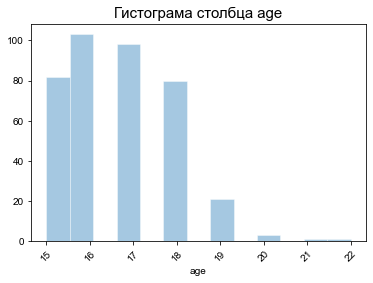

Статистика столбца age


count    389.000000
mean      16.673522
std        1.265662
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

In [12]:
gist(num_columns[0])

Вывод: пропусков нет, выбросов, по здравому смыслу, тоже нет

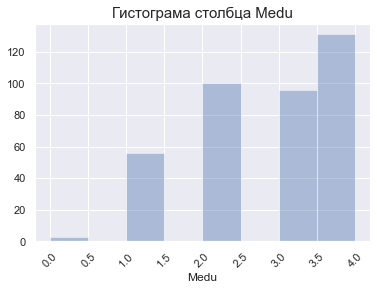

Статистика столбца Medu


count    386.000000
mean       2.766839
std        1.094277
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

In [13]:
gist(num_columns[1])

Вывод: пропуски есть (что с ними делать - определимся позже), выбросов нет

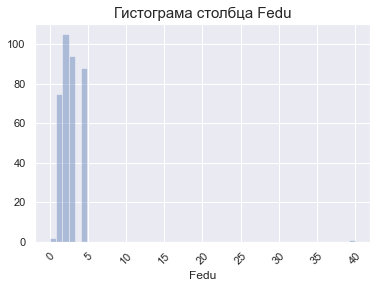

Статистика столбца Fedu


count    365.000000
mean       2.627397
std        2.241790
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

In [14]:
gist(num_columns[2])

Вывод: пропуски есть, есть выбросы (значения выше 4). Избавимся от выбросов:

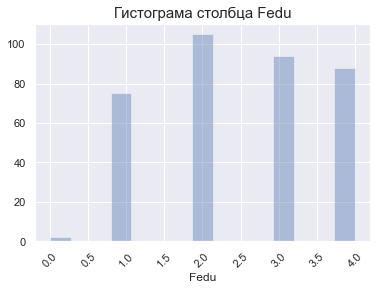

Статистика столбца Fedu


count    364.000000
mean       2.524725
std        1.086833
min        0.000000
25%        2.000000
50%        2.500000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

In [15]:
source['Fedu'] = source.Fedu.apply(lambda x: None if x > 4 else x)
gist(num_columns[2])

Выбросы устранены, пропуски пока оставим.

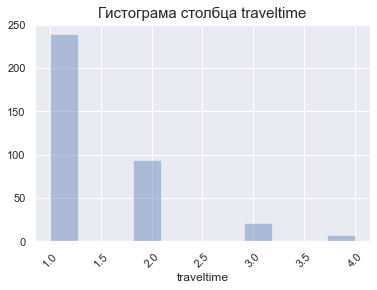

Статистика столбца traveltime


count    361.000000
mean       1.434903
std        0.692660
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

In [16]:
gist(num_columns[3])

Вывод: пропуски есть (что с ними делать - определимся позже), выбросов нет

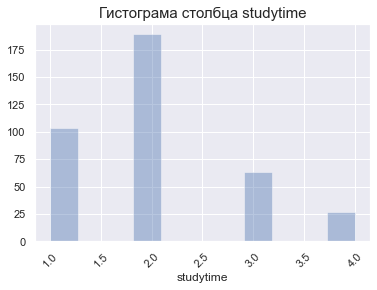

Статистика столбца studytime


count    382.000000
mean       2.036649
std        0.847239
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

In [17]:
gist(num_columns[4])

Вывод: пропуски есть (что с ними делать - определимся позже), выбросов нет

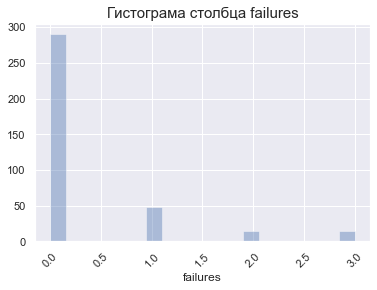

Статистика столбца failures


count    367.000000
mean       0.326975
std        0.729479
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

In [18]:
gist(num_columns[5])

Вывод: пропуски есть (что с ними делать - определимся позже), выбросов нет

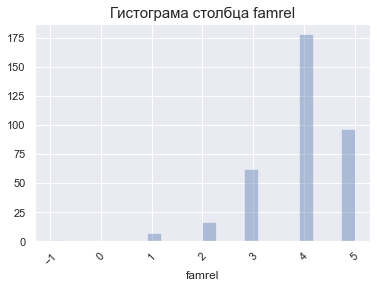

Статистика столбца famrel


count    362.000000
mean       3.930939
std        0.931554
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

In [19]:
gist(num_columns[6])

Вывод: есть пропуски, есть выброс (отрицательное значение). Избавимся от выброса:

In [20]:
source['famrel'] = source.famrel.apply(lambda x: None if x < 0 else x)

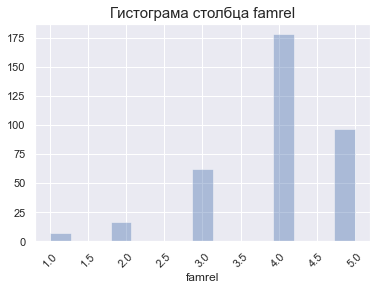

Статистика столбца famrel


count    361.000000
mean       3.944598
std        0.895811
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

In [21]:
gist(num_columns[6])

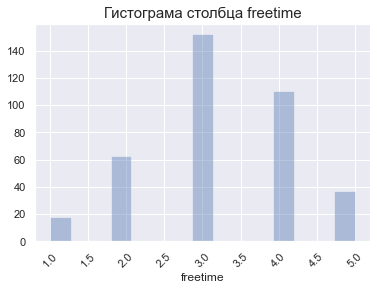

Статистика столбца freetime


count    380.000000
mean       3.223684
std        0.993364
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

In [22]:
gist(num_columns[7])

Вывод: есть пропуски, выбросов нет.

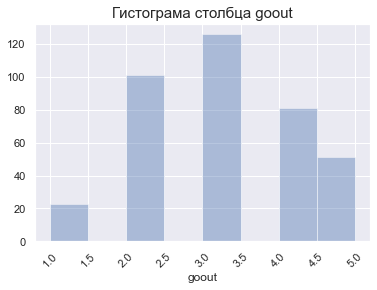

Статистика столбца goout


count    382.000000
mean       3.094241
std        1.116104
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

In [23]:
gist(num_columns[8])

Вывод: есть пропуски, выбросов нет.

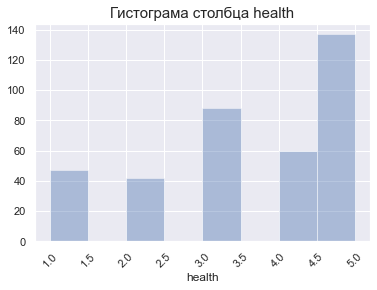

Статистика столбца health


count    374.000000
mean       3.529412
std        1.402006
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

In [24]:
gist(num_columns[9])

Вывод: есть пропуски, выбросов нет.

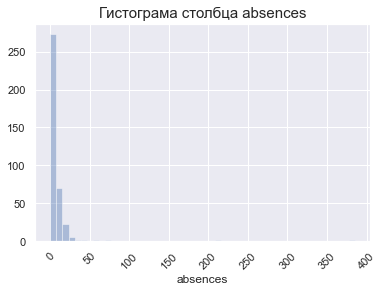

Статистика столбца absences


count    378.000000
mean       7.320106
std       23.615525
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

In [25]:
gist(num_columns[10])

Вывод: имеются пропуски, имеются значительные выбросы. Устраним выбросы с учетом интерквартильного расстояния:

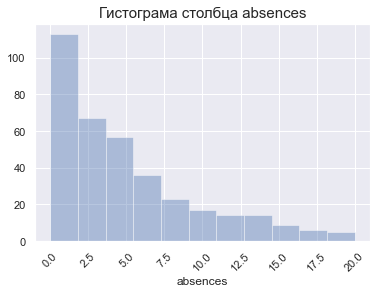

Статистика столбца absences


count    361.000000
mean       4.609418
std        4.989413
min        0.000000
25%        0.000000
50%        4.000000
75%        7.000000
max       20.000000
Name: absences, dtype: float64

In [26]:
perc25 = source.absences.quantile(0.25)
perc75 = source.absences.quantile(0.75)
IQR = perc75 - perc25
absences_IQR = source.absences.loc[source.absences.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
source['absences'] = source.absences.apply(
    lambda x: None if x not in set(absences_IQR) else x)
gist(num_columns[10])

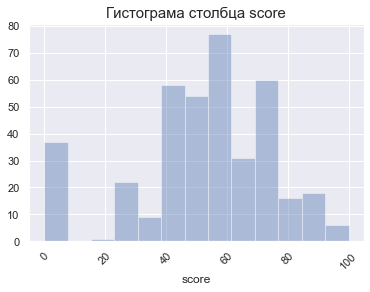

Статистика столбца score


count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

In [27]:
gist(num_columns[11])

Вывод: пропусков нет, выбросов нет.

### 1.3.1 Посмотрим на корреляцию числовых параметров

In [28]:
source.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.146736,-0.147952,0.073146,-0.018227,0.205919,0.054846,0.016099,0.121115,-0.068103,0.155469,-0.155726
Medu,-0.146736,1.000000,0.626536,-0.165838,0.081032,-0.240319,-0.010205,0.038265,0.072320,-0.048331,0.066439,0.213349
Fedu,-0.147952,0.626536,1.000000,-0.142170,0.013009,-0.272352,-0.026481,-0.012749,0.054938,0.017321,-0.023841,0.130002
traveltime,0.073146,-0.165838,-0.142170,1.000000,-0.105910,0.049738,-0.039304,-0.026299,0.032629,-0.011724,-0.050613,-0.070559
studytime,-0.018227,0.081032,0.013009,-0.105910,1.000000,-0.181947,0.029253,-0.125066,-0.053831,-0.079180,-0.075454,0.115741
failures,0.205919,-0.240319,-0.272352,0.049738,-0.181947,1.000000,0.000506,0.091608,0.107747,0.088013,0.076537,-0.344338
famrel,0.054846,-0.010205,-0.026481,-0.039304,0.029253,0.000506,1.000000,0.162715,0.064314,0.100807,-0.075903,0.051219
freetime,0.016099,0.038265,-0.012749,-0.026299,-0.125066,0.091608,0.162715,1.000000,0.296338,0.064315,0.096281,0.019026
goout,0.121115,0.072320,0.054938,0.032629,-0.053831,0.107747,0.064314,0.296338,1.000000,-0.018026,0.113048,-0.129685
health,-0.068103,-0.048331,0.017321,-0.011724,-0.079180,0.088013,0.100807,0.064315,-0.018026,1.000000,-0.013156,-0.070460


Наибольшая зависимость целевого показателя score обнаружилась от значений age, Medu, Fedu, studytime, failures, goout и absences. Оставим в наборе данных только эти параметры.

In [29]:
source.drop(['traveltime', 'famrel', 'freetime',
             'health'], axis=1, inplace=True)

In [30]:
display(source.head(10))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,goout,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,2.0,0.0,no,yes,no,no,no,yes,yes,no,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,2.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,2.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,2.0,0.0,no,yes,yes,no,yes,yes,no,no,2.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,2.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,2.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,1.0,0.0,75.0


## 1.4 Рассмотрим номинативные переменные

In [31]:
def object_info(column):
    """" получение информации о столбце с номинативной переменной"""
    display(pd.DataFrame(source[column].value_counts()))
    print("Значений, встретившихся в столбце более 10 раз:",
          (source[column].value_counts() > 10).sum())
    print("Уникальных значений:", source[column].nunique())
    print("Количество пропущенных значений:", source[column].isna().sum())

In [32]:
for col in object_columns:
    object_info(col)

,school
GP,344
MS,45


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Количество пропущенных значений: 0


,sex
F,204
M,185


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Количество пропущенных значений: 0


,address
U,291
R,83


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Количество пропущенных значений: 15


,famsize
GT3,255
LE3,107


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Количество пропущенных значений: 27


,Pstatus
T,308
A,36


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Количество пропущенных значений: 45


,Mjob
other,127
services,98
at_home,58
teacher,55
health,32


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5
Количество пропущенных значений: 19


,Fjob
other,194
services,99
teacher,29
at_home,16
health,15


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5
Количество пропущенных значений: 36


,reason
course,135
reputation,102
home,101
other,34


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 4
Количество пропущенных значений: 17


,guardian
mother,248
father,86
other,24


Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 3
Количество пропущенных значений: 31


,schoolsup
no,331
yes,49


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Количество пропущенных значений: 9


,famsup
yes,216
no,135


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Количество пропущенных значений: 38


,paid
no,197
yes,153


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Количество пропущенных значений: 39


,activities
yes,192
no,183


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Количество пропущенных значений: 14


,nursery
yes,297
no,77


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Количество пропущенных значений: 15


,higher
yes,350
no,19


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Количество пропущенных значений: 20


,internet
yes,300
no,55


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Количество пропущенных значений: 34


,romantic
no,235
yes,123


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Количество пропущенных значений: 31


In [33]:
def get_boxplot(column):
    """ построение box-plot для номинативных переменных в зависимости от score"""
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=source,
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

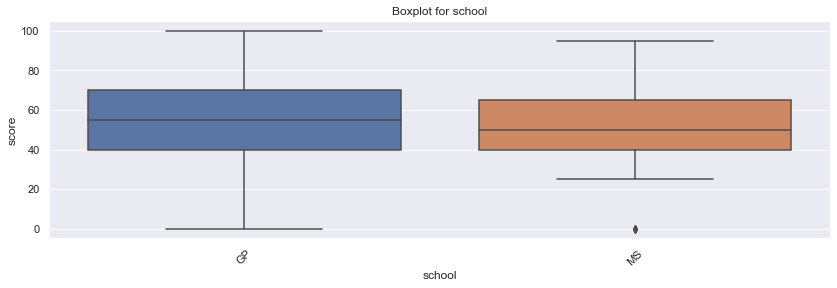

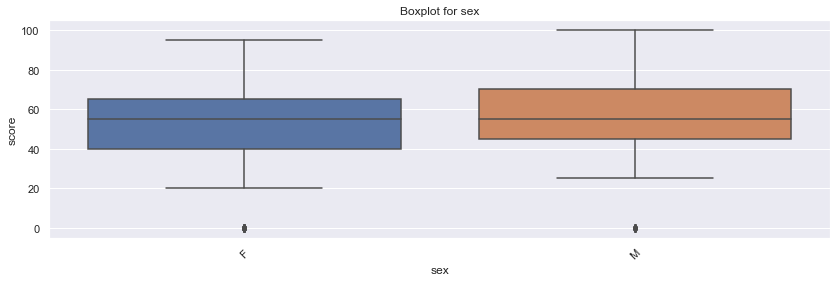

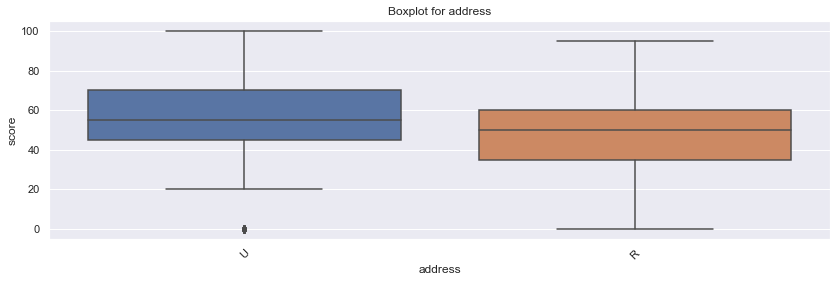

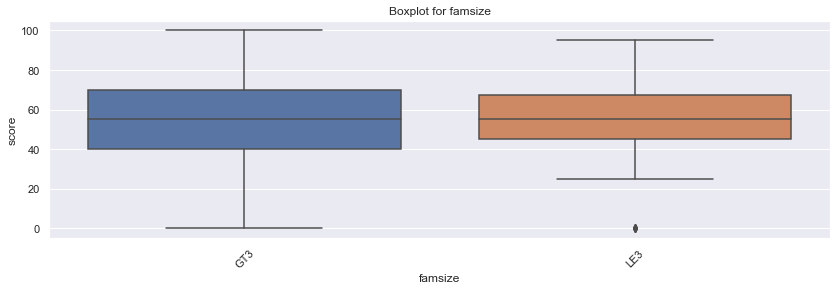

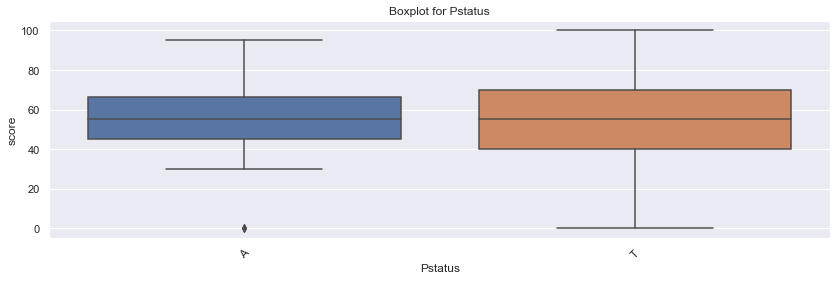

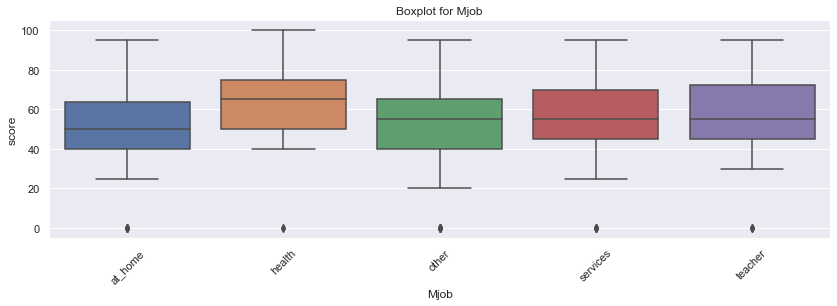

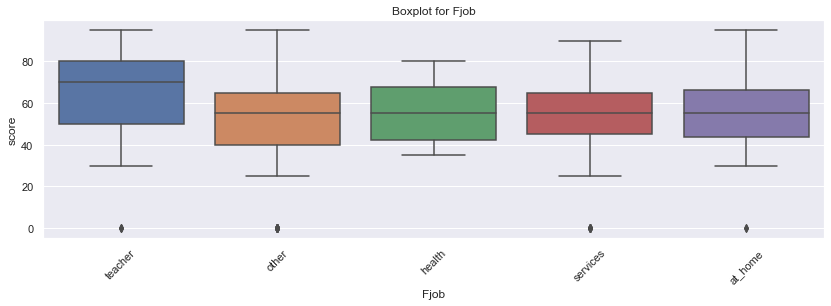

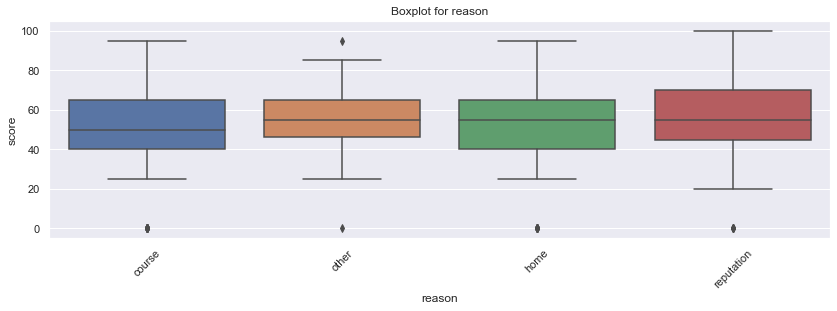

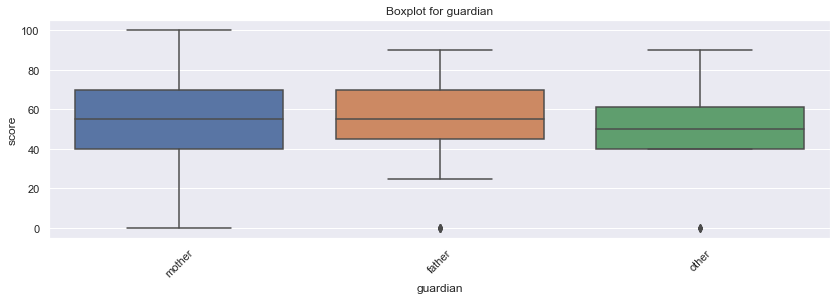

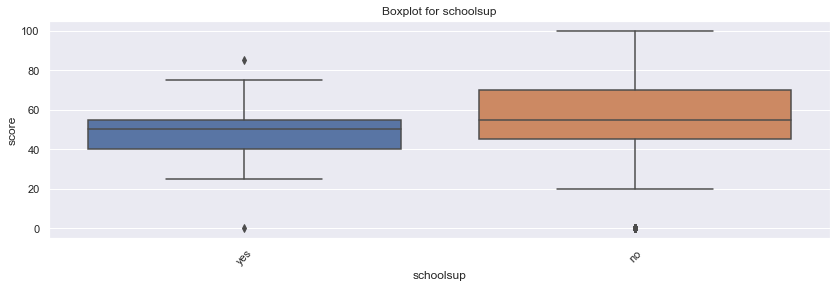

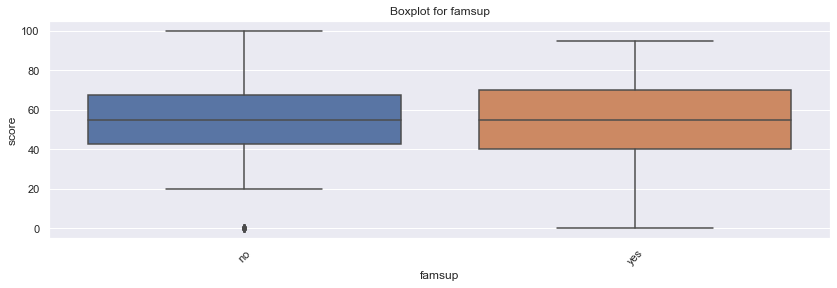

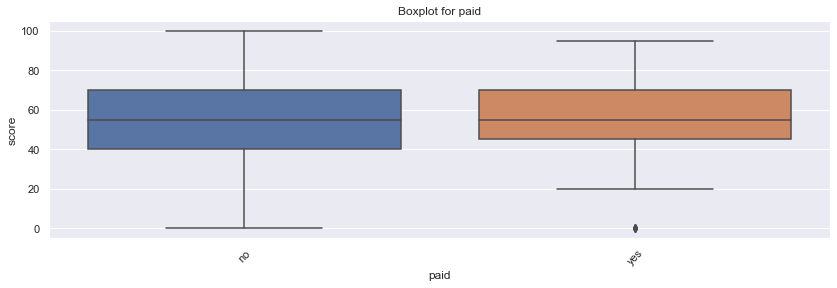

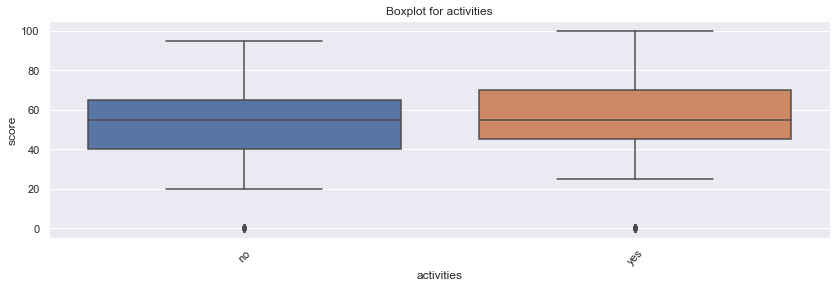

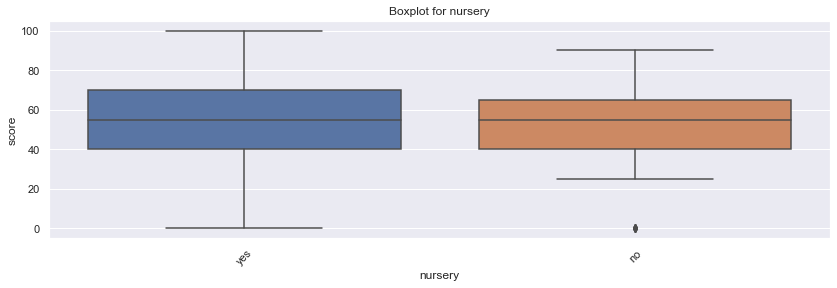

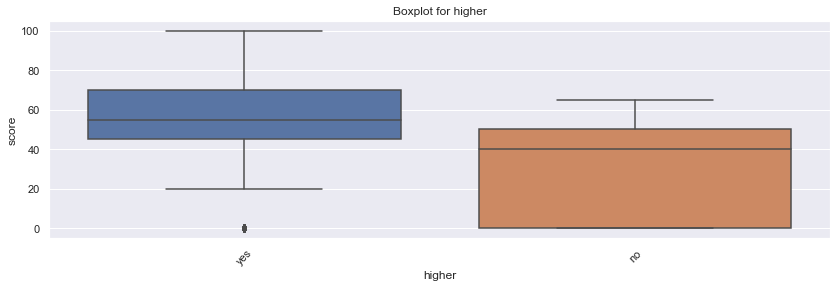

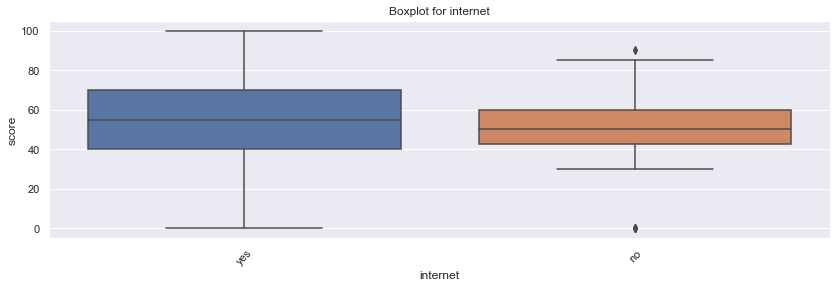

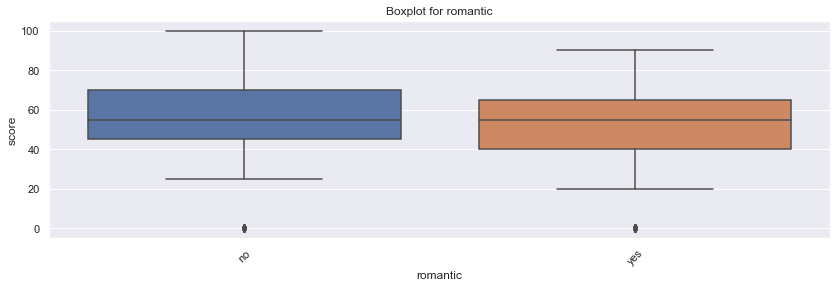

In [34]:
for col in object_columns:
    get_boxplot(col)

In [35]:
def get_stat_dif(column):
    """Проверим нулевую гипотезу о том, что распределения оценок по математике по различным параметрам неразличимы:"""
    cols = source[source[column].isnull() == False][column].unique()
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(source.loc[source.loc[:, column] == comb[0], 'score'],
                     source.loc[source.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.1/len(combinations_all):  # Учли поправку Бонферони, значение получено экпериментально
            # - для большего соотвествия box-plot
            print('Найдены статистически значимые различия для колонки', column)
            return True
    return False

In [36]:
non_valuable = []  # список незначимых переменных
for col in object_columns:
    result = get_stat_dif(col)
    if not result:
        non_valuable.append(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Вывод: найдены 7 ститистически значимых номинативных переменных, которые мы и оставим в наборе данных.

In [37]:
non_valuable

['school',
 'famsize',
 'Pstatus',
 'Fjob',
 'reason',
 'guardian',
 'famsup',
 'activities',
 'nursery',
 'internet']

In [38]:
source.drop(non_valuable, axis=1, inplace=True)

In [39]:
source

,sex,age,address,Medu,Fedu,Mjob,studytime,failures,schoolsup,paid,higher,romantic,goout,absences,score
0,F,18,U,4.0,4.0,at_home,2.0,0.0,yes,no,yes,no,4.0,6.0,30.0
1,F,17,U,1.0,1.0,at_home,2.0,0.0,no,no,yes,no,3.0,4.0,30.0
2,F,15,U,1.0,1.0,at_home,2.0,3.0,yes,NaN,yes,NaN,2.0,10.0,50.0
3,F,15,U,4.0,2.0,health,3.0,0.0,no,yes,yes,yes,2.0,2.0,75.0
4,F,16,U,3.0,3.0,other,2.0,0.0,no,yes,yes,no,2.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,M,20,U,2.0,2.0,services,2.0,2.0,no,yes,yes,no,4.0,NaN,45.0
385,M,17,U,3.0,1.0,services,1.0,0.0,no,no,yes,no,5.0,3.0,80.0
386,M,21,R,1.0,1.0,other,1.0,3.0,NaN,no,NaN,no,3.0,3.0,35.0
387,M,18,R,3.0,2.0,services,1.0,0.0,no,no,yes,no,1.0,0.0,50.0


# 2. Выводы

* В данных имеются пропуски, заполнять их некими произвольными значениями не вижу необходимости - это внесет дополнительную погрешность.
* Распределение числовых переменных в целом - нормальное.
* Номинативные переменные имеют различную степень влияния на целевой показатель.
* В результате предобработки данных обнаружены 14 параметров, значительно влияющие на целевой показатель score, именно они и оставлены в результирущем наборе данных для последующего использования: **sex,	age, address, Medu, Fedu, Mjob, studytime, failures, schoolsup, paid, higher, romantic, goout, absences, score**

